# Tarea 1


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Máxima Verosimilitud

¿Cual es el modelo a encontrar? Se propone que el modelo es una __constante__. Luego el modelo probabilístico tiene la forma $y = \mu + \epsilon$, donde $\mu $ es la constante que caracteriza al modelo y $\epsilon$ es ruido gaussiano. Esto es equivalente a decir que $y$ sigue una distribución normal $N(\mu, \sigma_{\epsilon}^2)$. Dado que las observaciones son condicionalmente indepentientes (todas siguen distribuciones normales con misma media y ruidos gaussianos), entonces se puede usar máxima verosimilitud para encontrar el parámetro $\mu$, y la función de verosimilitud viene dada por:

\begin{equation}
p(Y|\tilde{X}, \mu) = \prod_{i=1}^{N}N(y_i;\mu,\sigma_{i}^2)
\end{equation}

Donde N es el numero de estimaciones, $y_i$ es la estimacion i-ésima y $\sigma_{i}$ es la varianza de dicha estimación (depende de cada científico). Sin embargo, conceptualmente no queremos usar este _approach_ ya que queremos penalizar las observaciones que no se encuentran entre 9 y 10. Entonces se concluye que una __regresión bayesiana__ es más adecuada para resolver este problema. De esta forma, podremos favorecer las estimaciones que siguen distribuciones con varianza pequeña (científicos con mayor certeza).

# P2 Regresión Lineal

In [2]:
data = np.genfromtxt('datosT1.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

### A continuación se grafica la data:

[-0.12316272 30.97867776]


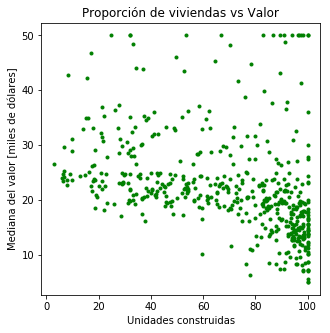

In [66]:
mpl.rcParams['figure.figsize'] = (5,5)
plt.figure()
plt.plot(x,y, 'g.')
plt.title("Proporción de viviendas vs Valor")
plt.xlabel("Unidades construidas")
plt.ylabel("Mediana del valor [miles de dólares]")
print(np.polyfit(x,y, 1))


### Regresión lineal regularizada

Sabemos que para la regresión lineal regularizada, el parámetro $\theta$ tiene la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Por lo que la identidad pertenecerá a $\rm I\!R^{2x2}$ y $\theta$ a $\rm I\!R^{2}$, lo cual tiene sentido ya que $\theta$ tiene la forma de un vector de dos componentes, cuyos valores corresponderán a la pendiente $m$ y el coeficiente de posición $b$ de una recta. 

In [4]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(np.add(np.matmul(x_tilda.transpose(), x_tilda), np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

Luego de obtener $\theta$ en función de $\rho$, procedemos a graficar predicciones para 10 puntos con distintos valores de $\rho$:

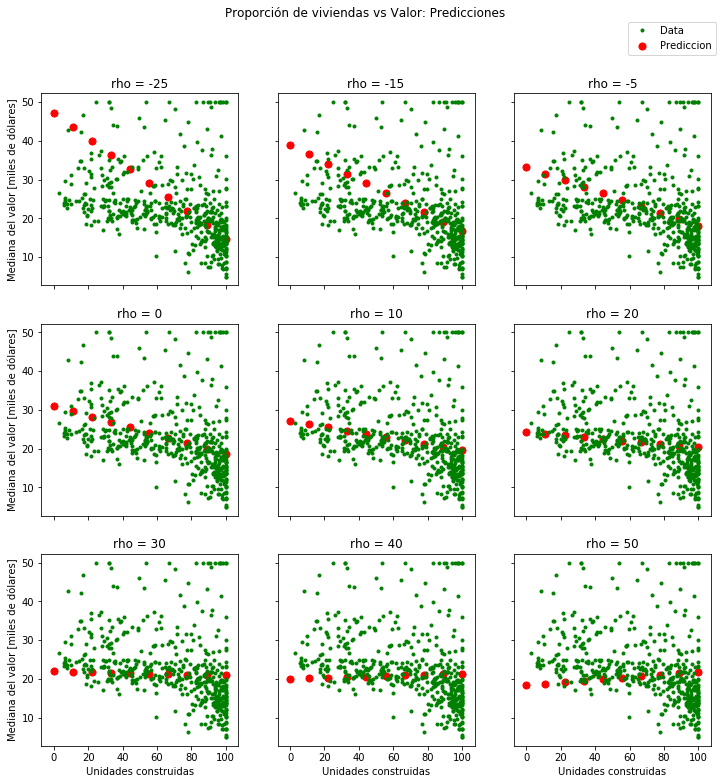

In [64]:
def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

fig_size = 12
mpl.rcParams['figure.figsize'] = (fig_size, fig_size)

x_recta = np.linspace(0, 100, 10)

scatter_size = 50

f, figures = plt.subplots(3, 3, sharex='col', sharey='row')

#pdb.set_trace()

plt.suptitle("Proporción de viviendas vs Valor: Predicciones")

rho = np.array([[-25, -15, -5], [0, 10, 20], [30, 40, 50]])

for idx, figure_arr in enumerate(figures):
    for idy, figure in enumerate(figure_arr):
        figure.set_title("rho = " + str(rho[idx][idy]))
        figure.scatter(x_recta,recta(x_recta, rho[idx][idy]), s=scatter_size, c='r')
        figure.plot(x,y, 'g.')   
            
        if idx == len(rho[0]) - 1:
            figure.set_xlabel("Unidades construidas")
        
        if idy == 0:
            figure.set_ylabel("Mediana del valor [miles de dólares]")
            
        if idy == len(rho[0]) - 1 and idx == 0:
            figure.legend(["Data","Prediccion"], bbox_to_anchor=(1.05, 1.40))

### Comparando con polyfit

Si obtenemos los parámetros de la recta usando __numpy.polyfit__ se obtiene lo siguiente:

Theta polyfit:  [-0.12316272 30.97867776]
Theta formula:  [-0.12316272 30.97867776]


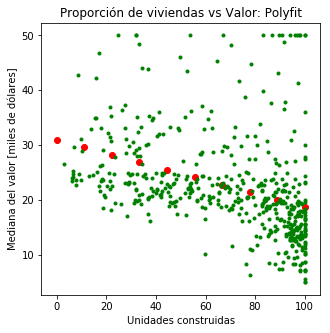

In [78]:
mpl.rcParams['figure.figsize'] = (5,5)
x_recta = np.linspace(0, 100, 10)
plt.figure()
plt.plot(x,y, 'g.')
plt.title("Proporción de viviendas vs Valor: Polyfit")
plt.xlabel("Unidades construidas")
plt.ylabel("Mediana del valor [miles de dólares]")
theta = np.polyfit(x,y, 1)
plt.scatter(x_recta,(lambda x: x*theta[0] + theta[1])(x_recta), c='r')

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [82]:
print("Theta polyfit: ", np.polyfit(x,y, 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [-0.12316272 30.97867776]
Theta formula:  [-0.12316272 30.97867776]
